# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Pandas version: 2.2.2
Matplotlib version: 3.9.2


1. Импортируйте модель данных "Ирисы Фишера".

In [3]:
import numpy as np
import pandas as pd

import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target

print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


2. Выполните нормализацию данных

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target

# Вывод первых 5 строк данных
print("Исходные данные:")
print(iris_data.head())

# Стандартизация
scaler_standard = StandardScaler()
iris_data_standardized = pd.DataFrame(scaler_standard.fit_transform(iris_data.iloc[:, :-1]), columns=iris.feature_names)
iris_data_standardized['species'] = iris_data['species']

# Мин-макс нормализация
scaler_minmax = MinMaxScaler()
iris_data_normalized = pd.DataFrame(scaler_minmax.fit_transform(iris_data.iloc[:, :-1]), columns=iris.feature_names)
iris_data_normalized['species'] = iris_data['species']

print("\nСтандартизованные данные:")
print(iris_data_standardized.head())

print("\nМинимально-максимально нормализованные данные:")
print(iris_data_normalized.head())

Исходные данные:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Стандартизованные данные:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4       

3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

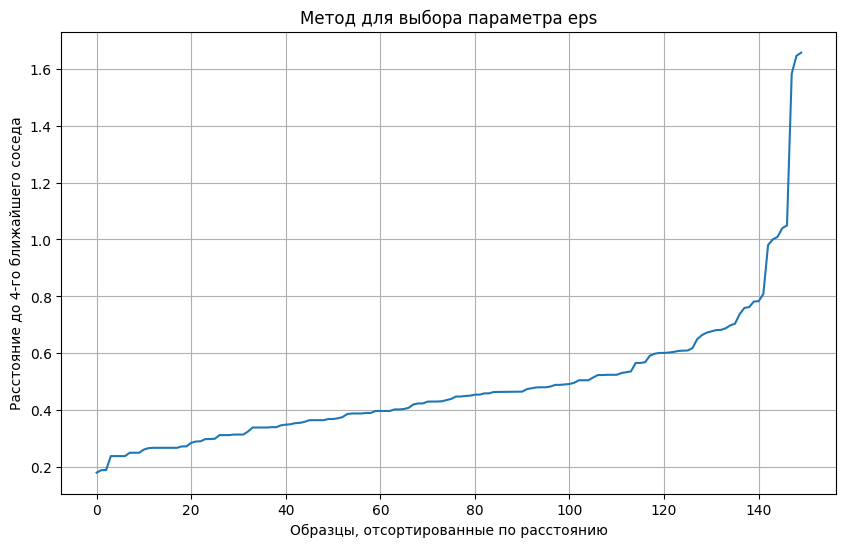

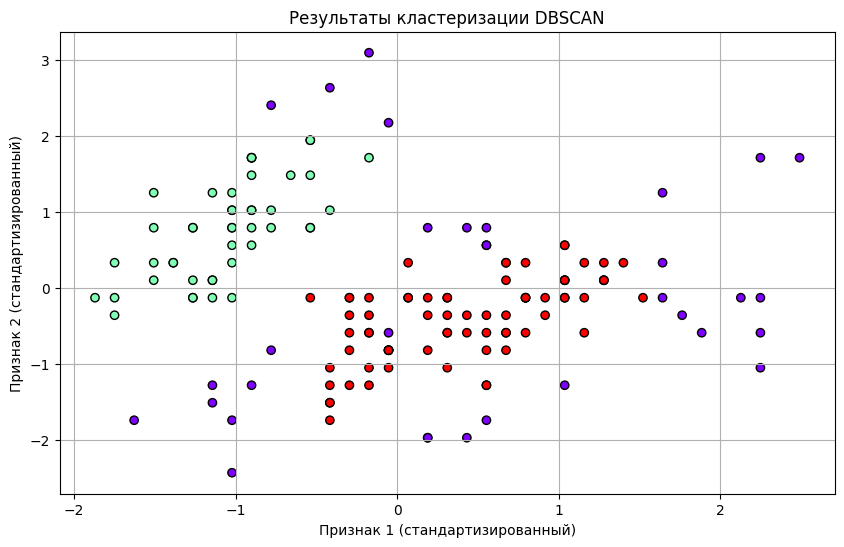

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# стандартизация
scaler = StandardScaler()
iris_data_scaled = scaler.fit_transform(iris_data)

from sklearn.neighbors import NearestNeighbors

#  параметры
nbrs = NearestNeighbors(n_neighbors=4).fit(iris_data_scaled)
distances, indices = nbrs.kneighbors(iris_data_scaled)

# расстояние до 4-го ближайшего соседа
distances = np.sort(distances[:,3], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Метод для выбора параметра eps')
plt.xlabel('Образцы, отсортированные по расстоянию')
plt.ylabel('Расстояние до 4-го ближайшего соседа')
plt.grid()
plt.show()


# Настраиваем параметры DBSCAN
eps = 0.5
min_samples = 5

# модель
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(iris_data_scaled)

# добавляем предсказанные кластеры в данные
iris_data['Cluster'] = clusters

# кластеры
plt.figure(figsize=(10, 6))
plt.scatter(iris_data_scaled[:, 0], iris_data_scaled[:, 1], c=clusters, cmap='rainbow', marker='o', edgecolor='k')
plt.title('Результаты кластеризации DBSCAN')
plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.grid()
plt.show()

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

<ipython-input-7-52aad098e836>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Spectral", len(unique_clusters))


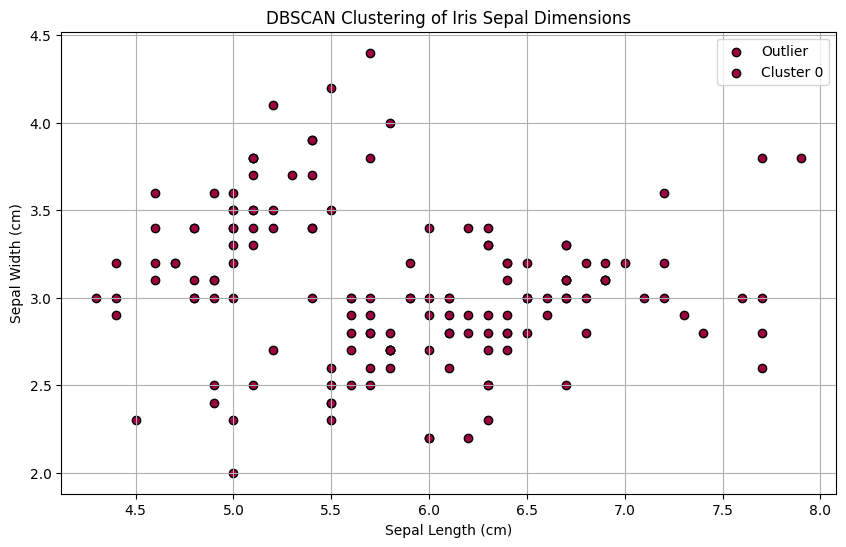

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Извлекаем  sepal length и sepal width
sepal_df = iris_data[['sepal length (cm)', 'sepal width (cm)']]

# Стандартизация
scaler = StandardScaler()
sepal_df_scaled = scaler.fit_transform(sepal_df)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(sepal_df_scaled)

# цвет. схема
unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap("Spectral", len(unique_clusters))

# диаграмма рассеяния
plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    # Отбор точек для  кластера
    cluster_data = sepal_df[clusters == cluster]
    plt.scatter(cluster_data['sepal length (cm)'],
                cluster_data['sepal width (cm)'],
                color=colors(cluster),
                label=f'Cluster {cluster}' if cluster != -1 else 'Outlier',
                edgecolor='k')

# Настройки графика
plt.title('DBSCAN Clustering of Iris Sepal Dimensions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

5. Сделайте вывод

Таким образом, применение метода кластеризации DBSCAN на наборе данных о цветках ириса позволяет не только визуализировать различные группы объектов, но и дает возможность исследовать их свойства и структуру.
Из визуализации можно оценить, как хорошо алгоритм смог выделить группы данных. Например, если группы четко отделены друг от друга, можно утверждать, что рекомендуется использовать модель с параметрами, которые мы задали.
Значения eps и min_samples влияют на количество обнаруженных кластеров. Экспериментируя с этими параметрами, можно улучшить качество кластеризации. Более высокое значение eps обычно приводит к меньшему количеству кластеров, в то время как более низкое значение может выделить больше мелких кластеров.


## Вопросы

1. В чем состоит задача кластеризации?
2. Для каких целей используется кластеризацияия?
3. Алгоритм кластеризации Ллойда.
4. Как выбрать количество кластеров для алгоритма K-средних
5. Алгоритм DBSCAN